# Python Leetcode challenge

## 23. Merge k Sorted Lists (Hard) 20230309

You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.

Merge all the linked-lists into one sorted linked-list and return it.

### Method 1 (110 ms wins 60.97%, 17.6 MB wins 67.97%)

In [24]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
import math
class Solution:
    def mergeKLists(self, lists):
        def merge(left,right):
            res = ListNode()
            substitude = res

            while(left and right):
                if left.val >= right.val:
                    substitude.next = right
                    right = right.next
                else:
                    substitude.next = left
                    left = left.next
                substitude = substitude.next

            if left:
                substitude.next = left
            else:
                substitude.next = right

            return res.next
        
        if len(lists) == 1:
            return lists[0]
        elif len(lists) == 0:
            return 
        
        middle = math.ceil(len(lists) / 2)
        left = lists[0: middle]
        right = lists[middle:]
        
        return merge(self.mergeKLists(left),self.mergeKLists(right))

我的解法其實就是直接將 merge sort 的概念直接用在該問題上，我們將 list 中的 element 一直分成兩塊，並且在逐一 merge 在一起。 唯一需要思考的地方在於 recursion 的寫法。
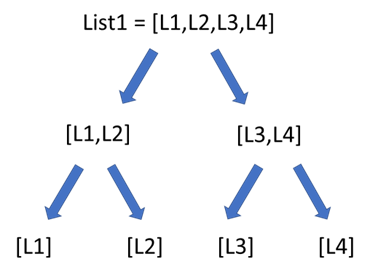

### Method 2 (100 ms wins 82.47%, 18.3 MB wins 32.97%)

In [ ]:
class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        tmp = []
        for curi in lists:
            while curi:
                tmp.append(curi.val)
                curi = curi.next
        tmp.sort()
        head = ListNode()
        curr = head
        for i in range(len(tmp)):
            curr.next = ListNode(val = tmp[i])
            curr = curr.next
        return head.next

Method 2 雖然比較快，但我覺得方法有點投機，因為他的做法其實很單純，將所有的 linked list 值取出來並 append 在 tmp 中後，再 sorting，接著再創建一個新的 linked list，雖然結果相同，但卻失去了練習 linked list 排序的機會。